In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_csv('stock_price.csv')
print(df.head())

          日付け     終値     始値     高値     安値      出来高   変化率 %
0  2024-08-01  156.3  159.3  159.4  156.1   79.15M  -2.56%
1  2024-07-31  160.4  158.2  160.7  158.1  173.91M   1.07%
2  2024-07-30  158.7  158.8  159.2  158.0  138.14M  -0.63%
3  2024-07-29  159.7  158.7  160.2  158.4  126.28M   1.14%
4  2024-07-26  157.9  159.3  159.6  157.9  155.08M  -0.13%


In [5]:
# Convert date column from dd-mm-yy format to datetime
df['日付け'] = pd.to_datetime(df['日付け'], format='%Y-%m-%d')

# Remove 'M' and 'B' suffix from 出来高 and convert to numeric
def convert_trading_volume(value):
    # Ensure the value is a string before processing
    value_str = str(value).strip()
    if 'M' in value_str:
        return float(value_str.replace('M', '').replace(',', '').strip()) * 1e6
    elif 'B' in value_str:
        return float(value_str.replace('B', '').replace(',', '').strip()) * 1e9
    return float(value_str.replace(',', '').strip())

# Apply the function to the 出来高 column
df['出来高'] = df['出来高'].apply(convert_trading_volume)

# Remove '%' from 変化率 % and convert to numeric
df['変化率 %'] = df['変化率 %'].astype(str).str.replace('%', '').astype(float)/100.0

# Convert other numeric columns to float
numeric_cols = ['終値', '始値', '高値', '安値']
df[numeric_cols] = df[numeric_cols].replace(',', '', regex=True).astype(float)

# Display the cleaned dataset
print(df.head())


         日付け     終値     始値     高値     安値          出来高   変化率 %
0 2024-08-01  156.3  159.3  159.4  156.1   79150000.0 -0.0256
1 2024-07-31  160.4  158.2  160.7  158.1  173910000.0  0.0107
2 2024-07-30  158.7  158.8  159.2  158.0  138140000.0 -0.0063
3 2024-07-29  159.7  158.7  160.2  158.4  126280000.0  0.0114
4 2024-07-26  157.9  159.3  159.6  157.9  155080000.0 -0.0013


In [6]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


                                 日付け           終値           始値           高値  \
count                           9202  9202.000000  9202.000000  9202.000000   
mean   2005-10-21 08:44:04.642469248    92.180961    92.256183    93.176451   
min              1987-02-12 00:00:00    33.000000    33.000000    33.200000   
25%              1996-06-06 06:00:00    52.000000    52.100000    52.800000   
50%              2005-10-11 12:00:00    85.100000    85.100000    86.050000   
75%              2015-03-04 18:00:00   110.800000   110.800000   111.900000   
max              2024-08-01 00:00:00   305.900000   309.800000   311.800000   
std                              NaN    50.452228    50.598215    51.049837   

                安値           出来高        変化率 %  
count  9202.000000  9.202000e+03  9202.000000  
mean     91.330146  1.726677e+08     0.000175  
min      32.200000  9.340000e+06    -0.147400  
25%      51.500000  8.073000e+07    -0.009400  
50%      84.200000  1.540150e+08     0.000000  


/tmp/ipykernel_292619/2420696706.py:15: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_292619/2420696706.py:15: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/omnesvera45/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/omnesvera45/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


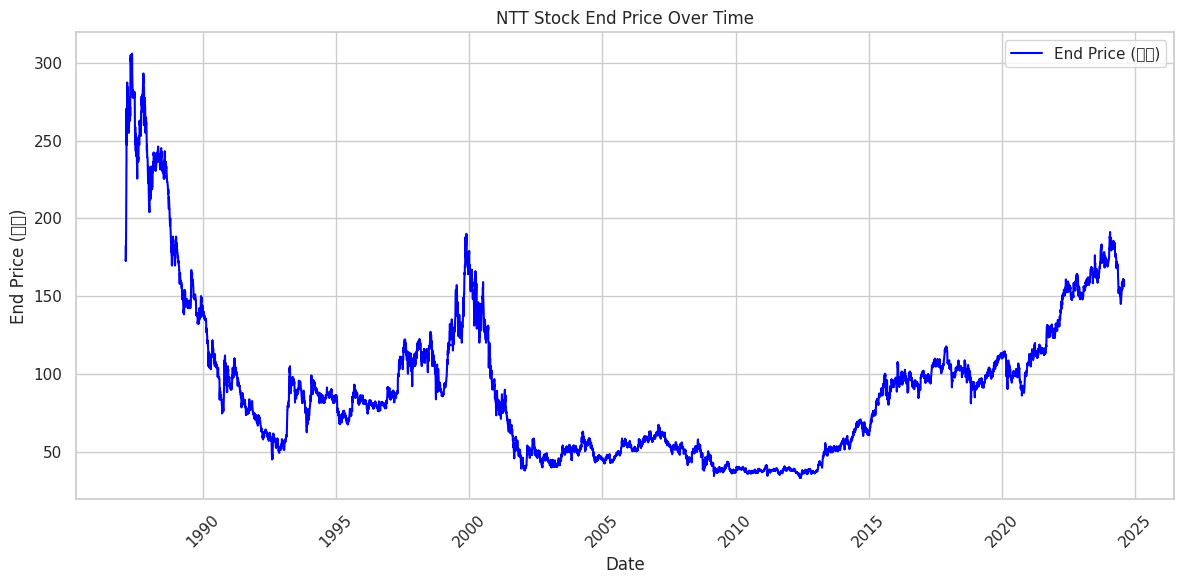

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style='whitegrid')

# Plotting the end price (終値) over time
plt.figure(figsize=(12, 6))
plt.plot(df['日付け'], df['終値'], label='End Price (終値)', color='blue')
plt.title('NTT Stock End Price Over Time')
plt.xlabel('Date')
plt.ylabel('End Price (終値)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/home/omnesvera45/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/omnesvera45/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/omnesvera45/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/omnesvera45/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/omnesvera45/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23433 (\N{CJK U

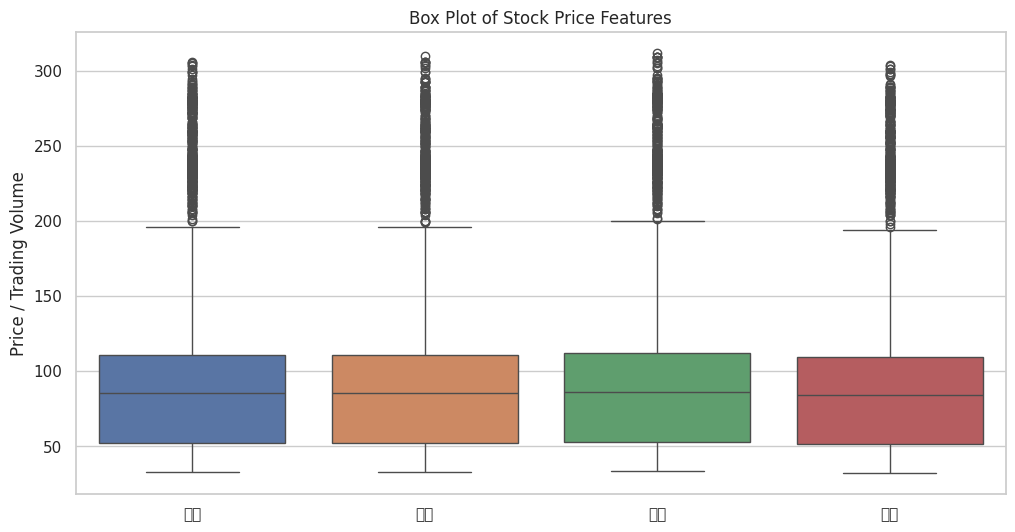

In [8]:
# Box plots for detecting outliers in numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plot of Stock Price Features')
plt.ylabel('Price / Trading Volume')
plt.show()


In [9]:

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

df = df.dropna()


Missing values in each column:
 日付け      0
終値       0
始値       0
高値       0
安値       0
出来高      0
変化率 %    0
dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

# Features to be scaled
features_to_scale = ['終値', '始値', '高値', '安値', '出来高', '変化率 %']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the scaled dataset
print(df.head())


         日付け        終値        始値        高値        安値       出来高     変化率 %
0 2024-08-01  1.270955  1.325095  1.297304  1.293207 -0.747417 -1.373521
1 2024-07-31  1.352225  1.303354  1.322771  1.333139  0.009929  0.560864
2 2024-07-30  1.318528  1.315213  1.293386  1.331143 -0.275954 -0.345046
3 2024-07-29  1.338349  1.313237  1.312976  1.339129 -0.370742  0.598166
4 2024-07-26  1.302670  1.325095  1.301222  1.329146 -0.140565 -0.078602


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Preparing the dataset for LSTM
data = df[['終値']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and test data
train_len = int(np.ceil(0.8 * len(scaled_data)))
train_data = scaled_data[:train_len]
test_data = scaled_data[train_len:]

# Create the training dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Reshape into X=t and Y=t+1
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=10)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(scaler.inverse_transform(test_data[time_step+1:]), test_predict))
print(f'LSTM RMSE: {rmse_lstm}')


Epoch 1/10


/home/omnesvera45/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7331/7331 ━━━━━━━━━━━━━━━━━━━━ 85s 11ms/step - loss: 0.0011
Epoch 2/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 87s 12ms/step - loss: 5.2220e-04
Epoch 3/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - loss: 4.1405e-04
Epoch 4/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 90s 12ms/step - loss: 4.2095e-04
Epoch 5/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 84s 12ms/step - loss: 3.4172e-04
Epoch 6/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 85s 12ms/step - loss: 3.3831e-04
Epoch 7/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - loss: 3.2583e-04
Epoch 8/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - loss: 2.9662e-04
Epoch 9/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 86s 12ms/step - loss: 2.8346e-04
Epoch 10/10
7331/7331 ━━━━━━━━━━━━━━━━━━━━ 86s 12ms/step - loss: 2.7061e-04
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
LSTM RMSE: 0.16035552582809653


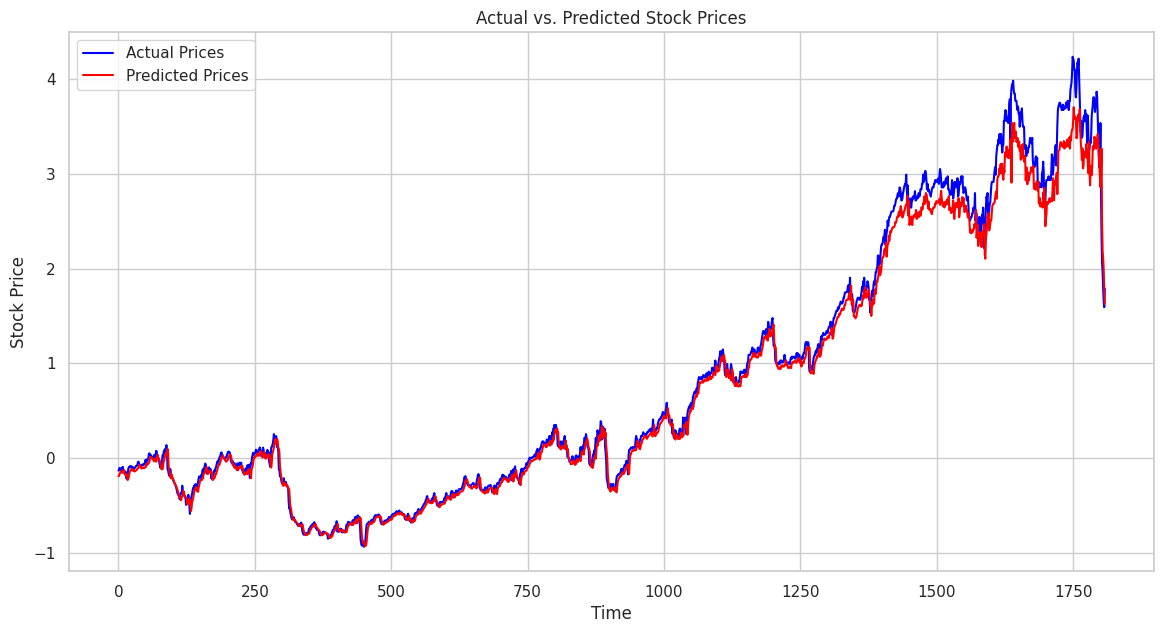

In [14]:

import matplotlib.pyplot as plt

# Create a plot to compare actual and predicted values
plt.figure(figsize=(14, 7))

# Plot the actual values
plt.plot(scaler.inverse_transform(test_data[time_step+1:]), label='Actual Prices', color='blue')

# Plot the predicted values
plt.plot(test_predict, label='Predicted Prices', color='red')

# Add labels and title
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
